In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

/var/folders/sl/q4v92dy13b15fkbcnvclbs2w0000gp/T/ipykernel_7923/637520550.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("loan_status.csv", delimiter=',', index_col=False)

In [3]:
data

,index,grade,sub_grade,loan_status,purpose
0,0,B,B2,Fully Paid,credit_card
1,1,C,C4,Charged Off,car
2,2,C,C5,Fully Paid,small_business
3,3,C,C1,Fully Paid,other
4,4,B,B5,Fully Paid,other
5,5,A,A4,Fully Paid,wedding
6,6,C,C5,Fully Paid,debt_consolidation
7,7,E,E1,Fully Paid,car
8,8,F,F2,Charged Off,small_business
9,9,B,B5,Charged Off,other


In [4]:
# Code #1: Contingency Table showing correlation between Grades and loan status.
data_crosstab = pd.crosstab(data['grade'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status  Charged Off  Fully Paid
grade                               
A                      1          11
B                      5          16
C                      3           8
D                      1           3
E                      0           1
F                      1           0


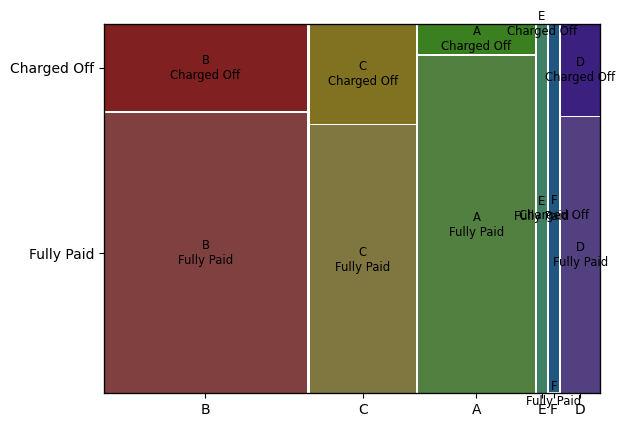

In [5]:
mosaic(data,['grade','loan_status']);

In [ ]:
# Code #2: Contingency Table showing correlation between Purpose and loan status.

In [6]:
data_crosstab = pd.crosstab(data['purpose'], 
                            data['loan_status'],
                                margins = False)
print(data_crosstab)

loan_status         Charged Off  Fully Paid
purpose                                    
car                           1           1
credit_card                   0           8
debt_consolidation            4          18
home_improvement              0           1
major_purchase                1           1
medical                       0           1
moving                        0           1
other                         4           5
small_business                1           2
wedding                       0           1


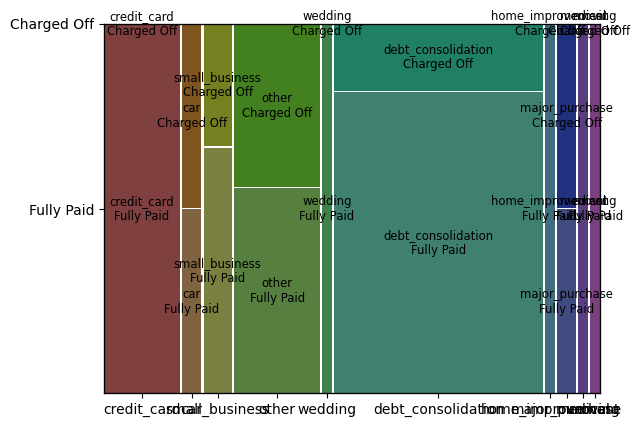

In [7]:
mosaic(data,['purpose','loan_status']);

In [8]:
# Code #3: Contingency Table showing correlation between Grades+Purpose and loan status.
data_crosstab = pd.crosstab([data.grade, data.purpose],
data.loan_status, margins = False)
print(data_crosstab)


loan_status               Charged Off  Fully Paid
grade purpose                                    
A     credit_card                   0           1
      debt_consolidation            1           7
      major_purchase                0           1
      other                         0           1
      wedding                       0           1
B     credit_card                   0           6
      debt_consolidation            1           5
      major_purchase                1           0
      medical                       0           1
      moving                        0           1
      other                         3           2
      small_business                0           1
C     car                           1           0
      credit_card                   0           1
      debt_consolidation            2           4
      home_improvement              0           1
      other                         0           1
      small_business                0           1


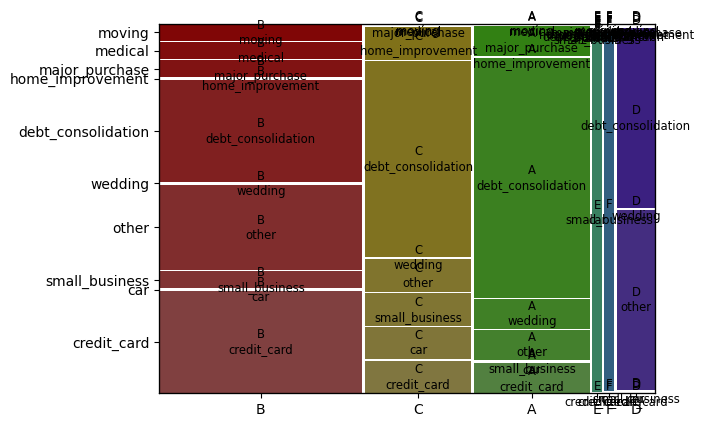

In [9]:
mosaic(data,['grade','purpose']);

So as in the code, Contingency Tables are giving clear correlation values between two and more variables. Thus making it much more useful to understand the data for further information extraction.

In [10]:
# Code #1: Contingency Table showing correlation between Grades and loan status.
tab = pd.crosstab(data['grade'],
                            data['loan_status'], 
                               margins = False)
tab

loan_status,Charged Off,Fully Paid
grade,,
A,1,11
B,5,16
C,3,8
D,1,3
E,0,1
F,1,0


In [27]:
tab2 = tab.iloc[:4,:]

In [28]:
tab2.iloc[3,0] = 2
tab2.iloc[3,1] = 4

/var/folders/sl/q4v92dy13b15fkbcnvclbs2w0000gp/T/ipykernel_7923/656919508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab2.iloc[3,0] = 2
/var/folders/sl/q4v92dy13b15fkbcnvclbs2w0000gp/T/ipykernel_7923/656919508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab2.iloc[3,1] = 4


In [29]:
tab2

loan_status,Charged Off,Fully Paid
grade,,
A,1,11
B,5,16
C,3,8
D,2,4


In [20]:
tab.iloc[3:,:].sum(axis=0)

loan_status
Charged Off    2
Fully Paid     4
dtype: int64

In [12]:
chi2_statistic

5.372909918364464

In [31]:
alpha = 0.05  # or choose your own alpha here

from scipy import stats
# Run a chi-squared and print out alpha, the p value,
# and whether the comparison says to reject the null hypothesis.
# (The dof and ex variables are values we don't need here.)
chi2_statistic, p_value, dof, ex = stats.chi2_contingency( tab )
reject_H0 = p_value < alpha
alpha, p_value, reject_H0

(0.05, 0.3499241510458776, False)

In [32]:
alpha = 0.05  # or choose your own alpha here

from scipy import stats
# Run a chi-squared and print out alpha, the p value,
# and whether the comparison says to reject the null hypothesis.
# (The dof and ex variables are values we don't need here.)
chi2_statistic, p_value, dof, ex = stats.chi2_contingency( tab2 )
reject_H0 = p_value < alpha
alpha, p_value, reject_H0

(0.05, 0.5779184719811683, False)

In [33]:
import statsmodels.api as sm


In [34]:
table = sm.stats.Table(tab)

In [35]:
table.table_orig

loan_status,Charged Off,Fully Paid
grade,,
A,1,11
B,5,16
C,3,8
D,2,4
E,0,1
F,1,0


In [36]:
rslt = table.test_nominal_association()
rslt.pvalue

0.6124245106080685

In [37]:
table.chi2_contribs

loan_status,Charged Off,Fully Paid
grade,,
A,1.183522,0.365285
B,0.000449,0.000139
C,0.063431,0.019577
D,0.241761,0.074618
E,0.060440,0.018654
F,1.180440,0.364333
